default - nie spłacenie należności

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as p
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('deposit_pred.xlsx')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,campaign,deposit,deposit_prediction
0,59,admin.,married,secondary,no,2343.0,yes,no,1,yes,no
1,56,admin.,married,secondary,no,45.0,no,no,1,yes,no
2,41,technician,married,secondary,no,1270.0,yes,no,1,yes,no
3,55,services,married,secondary,no,2476.0,yes,no,1,yes,no
4,54,admin.,married,tertiary,no,184.0,no,no,2,yes,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5067 entries, 0 to 5066
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5067 non-null   int64  
 1   job                 5063 non-null   object 
 2   marital             5067 non-null   object 
 3   education           5058 non-null   object 
 4   default             5067 non-null   object 
 5   balance             4947 non-null   float64
 6   housing             5067 non-null   object 
 7   loan                5067 non-null   object 
 8   campaign            5067 non-null   int64  
 9   deposit             5067 non-null   object 
 10  deposit_prediction  5067 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 435.6+ KB


In [ ]:
df['deposit_prediction'] = [0 if x =='no' else 1 for x in df['deposit_prediction']]

X = df.iloc[:, :-1]
y = df.deposit_prediction

In [ ]:
X.head()

,age,job,marital,education,default,balance,housing,loan,campaign,deposit
0,59,admin.,married,secondary,no,2343.0,yes,no,1,yes
1,56,admin.,married,secondary,no,45.0,no,no,1,yes
2,41,technician,married,secondary,no,1270.0,yes,no,1,yes
3,55,services,married,secondary,no,2476.0,yes,no,1,yes
4,54,admin.,married,tertiary,no,184.0,no,no,2,yes


In [ ]:
y

0       0
1       0
2       0
3       0
4       1
       ..
5062    0
5063    0
5064    1
5065    0
5066    0
Name: deposit_prediction, Length: 5067, dtype: int64

In [ ]:
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'job' has 13 unique categories
Feature 'marital' has 4 unique categories
Feature 'education' has 6 unique categories
Feature 'default' has 2 unique categories
Feature 'housing' has 2 unique categories
Feature 'loan' has 2 unique categories
Feature 'deposit' has 1 unique categories


In [ ]:
todummy_list = ['job','marital','education','default','housing','loan','deposit']

In [ ]:
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        del df[x]
        df = pd.concat([df, dummies], axis=1)
    return df

In [ ]:
X = dummy_df(X, todummy_list)
print(X.head(5))

   age  balance  campaign  job_admin.  job_blue-collar  job_entrepreneur  \
0   59   2343.0         1        True            False             False   
1   56     45.0         1        True            False             False   
2   41   1270.0         1       False            False             False   
3   55   2476.0         1       False            False             False   
4   54    184.0         2        True            False             False   

   job_housemaid  job_management  job_retired  job_self-employed  ...  \
0          False           False        False              False  ...   
1          False           False        False              False  ...   
2          False           False        False              False  ...   
3          False           False        False              False  ...   
4          False           False        False              False  ...   

   education_secondary  education_tertiary  education_unknown  default_no  \
0                 True     

In [ ]:
X.isnull().sum().sort_values(ascending=False).head()

balance             120
age                   0
marital_divorced      0
loan_yes              0
loan_no               0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer()
imp.fit(X)
X = pd.DataFrame(data=imp.transform(X), columns=X.columns)

In [ ]:
X

,age,balance,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,deposit_yes
0,59.0,2343.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,56.0,45.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,41.0,1270.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
3,55.0,2476.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
4,54.0,184.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5062,38.0,6728.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
5063,35.0,611.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
5064,38.0,1805.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
5065,43.0,-399.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [ ]:
X.isnull().sum()

age                    0
balance                0
campaign               0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_NOINF          0
marital_divorced       0
marital_married        0
marital_single         0
education_NOINF        0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
default_no             0
default_yes            0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
deposit_yes            0
dtype: int64

<ipython-input-59-cd342893cf11>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=X['balance'], orient='h', palette='rainbow')


<Axes: xlabel='balance'>

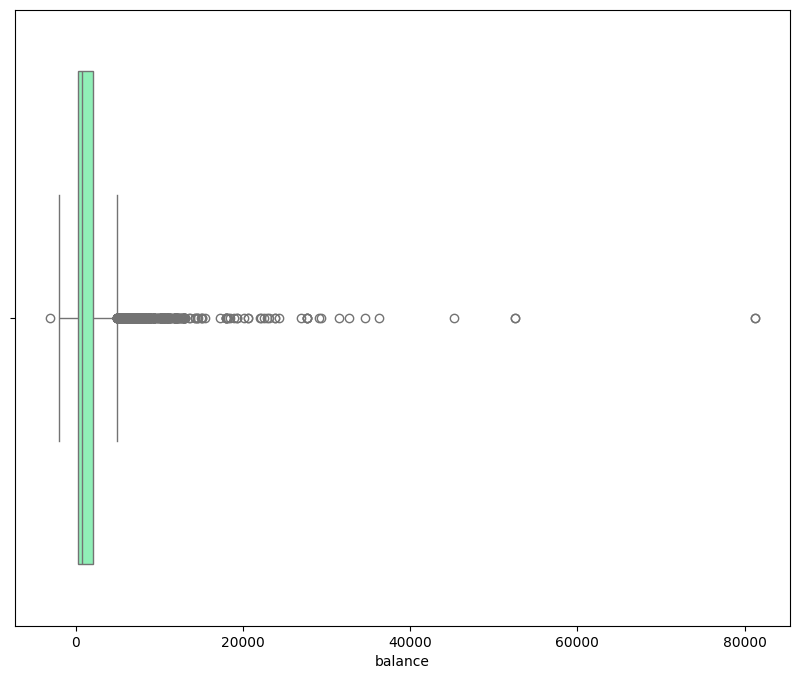

In [ ]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(ax=ax, data=X['balance'], orient='h', palette='rainbow')

In [ ]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [ ]:
tukey_indices, tukey_values = find_outliers_tukey(X['balance'])
print(np.sort(tukey_values))

[-3058.  4917.  4922.  4930.  4945.  4945.  4945.  4951.  4963.  4979.
  4984.  4984.  4987.  4987.  5005.  5021.  5021.  5024.  5024.  5028.
  5037.  5037.  5041.  5060.  5060.  5060.  5063.  5073.  5086.  5106.
  5108.  5110.  5112.  5112.  5115.  5115.  5115.  5169.  5169.  5188.
  5205.  5220.  5236.  5254.  5267.  5267.  5275.  5291.  5291.  5293.
  5296.  5301.  5303.  5303.  5310.  5310.  5310.  5310.  5313.  5313.
  5329.  5345.  5346.  5355.  5359.  5359.  5359.  5359.  5361.  5372.
  5389.  5397.  5397.  5437.  5437.  5447.  5461.  5462.  5462.  5473.
  5473.  5474.  5475.  5475.  5511.  5511.  5514.  5517.  5539.  5561.
  5561.  5561.  5583.  5584.  5603.  5613.  5637.  5639.  5679.  5689.
  5689.  5701.  5701.  5715.  5715.  5724.  5741.  5763.  5768.  5773.
  5774.  5795.  5802.  5806.  5810.  5839.  5845.  5872.  5878.  5887.
  5887.  5909.  5958.  5966.  5990.  6005.  6013.  6016.  6027.  6027.
  6036.  6046.  6046.  6060.  6089.  6101.  6112.  6138.  6138.  6158.
  6170

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X
pca = PCA(n_components=10) #deklaratywna ilosc komponentów
X_pca = pd.DataFrame(pca.fit_transform(X))

In [ ]:
explained_variance= pca.explained_variance_ratio_
explained_variance

array([0.09378124, 0.09156406, 0.07119622, 0.06585312, 0.0598849 ,
       0.04975117, 0.04745397, 0.04623038, 0.04076023, 0.03863201])

In [ ]:
pca = PCA(n_components=5) #wybrana ilosc komponentów
X_pca = pd.DataFrame(pca.fit_transform(X))

In [ ]:
X_pca.head()

,0,1,2,3,4
0,1.332320,1.703181,-0.550657,-0.959961,0.967906
1,-0.149566,1.470926,-1.366304,0.175086,-0.489166
2,1.494535,0.929636,-0.429757,-0.964289,1.181650
3,1.467605,1.574699,-0.561633,-0.608419,1.123781
4,-1.309566,0.385595,0.190812,-0.229990,-0.412794


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.70, random_state=1)

In [ ]:
print(df.shape)
print(X_pca.shape)

(5067, 11)
(5067, 5)
